In [1]:
# Dane do pobrania z from https://archive.ics.uci.edu/ml/datasets/Dermatology

In [2]:
# Załadowanie bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense

In [4]:
col_names = ['erythema',
'scaling',
'definite borders',
'itching',
'koebner phenomenon',
'polygonal papules',
'follicular papules',
'oral mucosal involvement',
'knee and elbow involvement',
'scalp involvement',
'family history',
'melanin incontinence',
'eosinophils in the infiltrate',
'PNL infiltrate',
'fibrosis of the papillary dermis',
'exocytosis',
'acanthosis',
'hyperkeratosis',
'parakeratosis',
'clubbing of the rete ridges',
'elongation of the rete ridges',
'thinning of the suprapapillary epidermis',
'spongiform pustule',
'munro microabcess',
'focal hypergranulosis',
'disappearance of the granular layer',
'vacuolisation and damage of basal layer',
'spongiosis',
'saw-tooth appearance of retes',
'follicular horn plug',
'perifollicular parakeratosis',
'inflammatory monoluclear inflitrate',
'band-like infiltrate',
'Age',
'disease']

In [5]:
dis_dict = {0: '?', 
1: 'psoriasis',
2: 'seboreic dermatitis',
3: 'lichen planus',
4: 'pityriasis rosea',
5: 'cronic dermatitis ',
6: 'pityriasis rubra pilaris'
}

In [6]:
df = pd.read_csv('dermatology.data', names=col_names)

In [7]:
df

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,disease
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [8]:
df.dtypes

erythema                                     int64
scaling                                      int64
definite borders                             int64
itching                                      int64
koebner phenomenon                           int64
polygonal papules                            int64
follicular papules                           int64
oral mucosal involvement                     int64
knee and elbow involvement                   int64
scalp involvement                            int64
family history                               int64
melanin incontinence                         int64
eosinophils in the infiltrate                int64
PNL infiltrate                               int64
fibrosis of the papillary dermis             int64
exocytosis                                   int64
acanthosis                                   int64
hyperkeratosis                               int64
parakeratosis                                int64
clubbing of the rete ridges    

In [9]:
# Wymieszanie danych
df = df.sample(frac = 1) 

In [10]:
# Porządkujemy dane w kolumnie 'Age'
df.Age.replace({'?':0}, inplace = True)
df.Age = pd.to_numeric(df.Age)

# Uzupełniamy braki danych medianą wieku
df[df.Age == 0]['Age'] = df.Age.median()

In [11]:
# Zmieniamy wszystkie dane na postać numeryczną
for col in df.columns:
    df[col] = pd.to_numeric(df[col])

In [12]:
feats = df.columns.tolist()
feats.remove('disease')

In [13]:
feats

['erythema',
 'scaling',
 'definite borders',
 'itching',
 'koebner phenomenon',
 'polygonal papules',
 'follicular papules',
 'oral mucosal involvement',
 'knee and elbow involvement',
 'scalp involvement',
 'family history',
 'melanin incontinence',
 'eosinophils in the infiltrate',
 'PNL infiltrate',
 'fibrosis of the papillary dermis',
 'exocytosis',
 'acanthosis',
 'hyperkeratosis',
 'parakeratosis',
 'clubbing of the rete ridges',
 'elongation of the rete ridges',
 'thinning of the suprapapillary epidermis',
 'spongiform pustule',
 'munro microabcess',
 'focal hypergranulosis',
 'disappearance of the granular layer',
 'vacuolisation and damage of basal layer',
 'spongiosis',
 'saw-tooth appearance of retes',
 'follicular horn plug',
 'perifollicular parakeratosis',
 'inflammatory monoluclear inflitrate',
 'band-like infiltrate',
 'Age']

In [14]:
# Określamy zmienne objaśniające i zmienną objaśnianą
X = df[feats].values
y = df.disease.values

In [15]:
# Skalujemy zmienne objaśniające
X_scale = MinMaxScaler().fit_transform(X)

In [16]:
X_scale

array([[0.33333333, 0.33333333, 0.        , ..., 0.66666667, 0.        ,
        0.8       ],
       [0.66666667, 0.66666667, 0.66666667, ..., 0.66666667, 0.        ,
        0.29333333],
       [0.66666667, 0.33333333, 0.33333333, ..., 1.        , 1.        ,
        0.64      ],
       ...,
       [0.66666667, 0.66666667, 1.        , ..., 0.66666667, 0.66666667,
        0.69333333],
       [0.66666667, 0.33333333, 0.33333333, ..., 0.33333333, 0.33333333,
        0.16      ],
       [1.        , 0.66666667, 1.        , ..., 0.33333333, 0.        ,
        0.74666667]])

In [17]:
# Podział na zbiór treningowy, testowy i walidacyjny

X_train, X_val_test, y_train, y_val_test = train_test_split(X_scale, y, test_size=0.3)

X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5)  

In [18]:

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val) 

In [19]:
num_of_output = y_val.shape[1]
num_of_output

7

In [20]:
model = Sequential(
    [
        Dense(15, activation='relu', input_shape=(34,)),
        Dense(num_of_output, activation='softmax')
    ]
)

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
8/8 [==============================] - 0s 17ms/step - loss: 2.0549 - accuracy: 0.0703 - val_loss: 1.9630 - val_accuracy: 0.1091
Epoch 2/50
8/8 [==============================] - 0s 3ms/step - loss: 1.9358 - accuracy: 0.1406 - val_loss: 1.8635 - val_accuracy: 0.2909
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: 1.8236 - accuracy: 0.2695 - val_loss: 1.7739 - val_accuracy: 0.4000
Epoch 4/50
8/8 [==============================] - 0s 3ms/step - loss: 1.7233 - accuracy: 0.4492 - val_loss: 1.6899 - val_accuracy: 0.4545
Epoch 5/50
8/8 [==============================] - 0s 3ms/step - loss: 1.6317 - accuracy: 0.5820 - val_loss: 1.6112 - val_accuracy: 0.4727
Epoch 6/50
8/8 [==============================] - 0s 3ms/step - loss: 1.5433 - accuracy: 0.6094 - val_loss: 1.5403 - val_accuracy: 0.4909
Epoch 7/50
8/8 [==============================] - 0s 3ms/step - loss: 1.4629 - accuracy: 0.6016 - val_loss: 1.4757 - val_accuracy: 0.4909
Epoch 8/50
8/8 [=================

In [23]:
model.evaluate(X_test, y_test)[1]

2/2 [==============================] - 0s 2ms/step - loss: 0.2842 - accuracy: 0.9455


0.9454545378684998

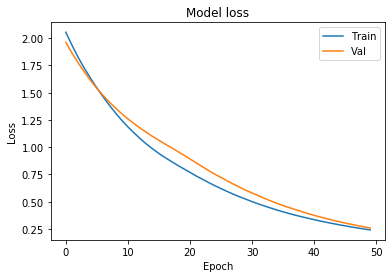

In [24]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

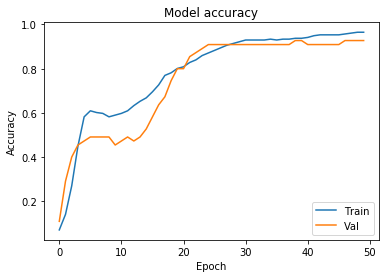

In [25]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [26]:
# Save model to JSON
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

model.save_weights('weights.h5')

In [27]:
# Load model
json_file = open('model.json', 'r')
json_model = json_file.read()
json_file.close()

In [28]:
from keras.models import model_from_json

In [29]:
loaded_model = model_from_json(json_model)
loaded_model.load_weights('weights.h5')

In [30]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
# Evaluate model
yy = to_categorical(y)

In [32]:
score = loaded_model.evaluate(X_scale, yy, verbose=0)

In [33]:
print(loaded_model.metrics_names[1], score[1]*100)

accuracy 95.62841653823853


In [34]:
# K Fold evaluation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from scikitplot.estimators import plot_learning_curve

cv = KFold(n_splits=3)

score_list = []
for train_index, test_index in cv.split(X_scale, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1) 
    y_test = np.argmax(y_test, axis=1)
    
    score = accuracy_score(y_test, y_pred)
    score_list.append(score)

print(np.round(np.mean(score_list),5))


8/8 [==============================] - 0s 2ms/step - loss: 0.2625 - accuracy: 0.9221
0.86339


In [45]:
# Predykcja  na nowych danych
losowy_index = 82

new_data = X_scale[[losowy_index]] # pseudo-nowe dane
new_data

array([[1.        , 0.66666667, 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.33333333, 0.        ,
        1.        , 0.66666667, 0.        , 0.33333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.66666667, 0.        , 0.69333333]])

In [46]:
# Labels
y_labs = len(set(y))+1
labels = list(range(y_labs))
labels

[0, 1, 2, 3, 4, 5, 6]

In [47]:
# Predykcja - prawdopodobienstwa
predicted = loaded_model.predict_proba(new_data)[0].tolist()
predicted

[0.004445628263056278,
 0.0027159180026501417,
 0.928976833820343,
 0.013922258280217648,
 0.04111108556389809,
 0.003123331116512418,
 0.005704960785806179]

Najbardziej prawdopodobna choroba: 
2 - seboreic dermatitis


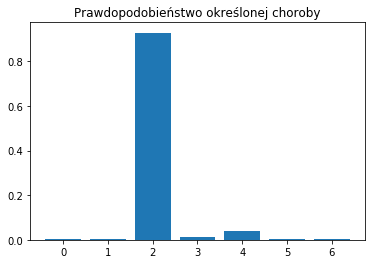

In [48]:
# Weryfikacja
plt.title('Prawdopodobieństwo określonej choroby')
plt.bar(labels, predicted)
print('Najbardziej prawdopodobna choroba: ')
print(f'{np.argmax(predicted)} - {dis_dict[np.argmax(predicted)]}')

In [49]:
df.iloc[[losowy_index],-1] # powinna wyjść taka choroba

146    2
Name: disease, dtype: int64